In [80]:
%load_ext autoreload
%autoreload 2
%load_ext jupyter_black

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The jupyter_black extension is already loaded. To reload it, use:
  %reload_ext jupyter_black


In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [82]:
data_size = 10000
raw_data = pd.read_csv(f"raw_data_{data_size}.csv")

/tmp/ipykernel_128885/3610206408.py:2: DtypeWarning: Columns (144) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_data = pd.read_csv(f"raw_data_{data_size}.csv")


In [83]:
raw_data.head()

,type,link.data.zone,link.data.neighborhood,link.data.street,link.data.streetNumber,link.data.state,link.data.city,link.name,link.href,link.rel,...,listing.pricingInfo.priceMap.RENTAL.businessType,listing.pricingInfo.priceMap.RENTAL.rentalTotalPrice,listing.pricingInfo.priceMap.RENTAL.yearlyIptu,listing.pricingInfo.priceMap.RENTAL.monthlyCondoFee,listing.priceSuggestion.min,listing.priceSuggestion.central,listing.priceSuggestion.max,listing.priceSuggestion.desvpad,listing.priceSuggestion.num_vizinhos,listing.priceSuggestion.updated_at
0,superPremium,Zona Norte,Campinho,Rua Cincinato da Silva,80,Rio de Janeiro,Rio de Janeiro,"Casa com 4 Quartos à venda, 320m²",/imovel/venda-casa-4-quartos-campinho-zona-nor...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,superPremium,Zona Sul,Jardim Aeroporto,NaN,NaN,São Paulo,São Paulo,"Casa com 3 Quartos à venda, 140m²",/imovel/venda-casa-3-quartos-jardim-aeroporto-...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,superPremium,Bairros,Residencial Sirio Libanes II,Travessa do Café Suave,82,Mato Grosso do Sul,Campo Grande,"Casa com 3 Quartos à venda, 120m²",/imovel/venda-casa-3-quartos-residencial-sirio...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,premium,Bairros,Vila Guilhermina,Rua Rubens Ferreira Martins,NaN,São Paulo,Praia Grande,"Casa com 3 Quartos à venda, 214m²",/imovel/venda-casa-3-quartos-mobiliado-vila-gu...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,Bairros,Jardim Europa,Avenida Suíça,NaN,São Paulo,Piracicaba,"Casa com 4 Quartos à venda, 400m²",/imovel/venda-casa-4-quartos-com-churrasqueira...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
# Exemplo de manipulação de colunas
raw_data.rename(
    columns={
        "listing.pricingInfo.rawPrice": "price",
        "link.data.city": "city",
        "link.data.state": "state",
        "listing.usableAreas": "usable_areas",
        "listing.totalAreas": "total_areas",
        "listing.parkingSpaces": "parking_spaces",
        "listing.suites": "suites",
        "listing.bathrooms": "bathrooms",
        "listing.bedrooms": "bedrooms",
    },
    inplace=True,
)

In [85]:
cols_to_select = [
    "price",
    "city",
    "state",
    "usable_areas",
    "total_areas",
    "parking_spaces",
    "suites",
    "bathrooms",
    "bedrooms",
]
numeric_cols = [
    "price",
    "usable_areas",
    "total_areas",
    "parking_spaces",
    "suites",
    "bathrooms",
    "bedrooms",
]

In [86]:
data = raw_data[cols_to_select]

In [87]:
data.shape

(10000, 9)

### Check for missing values 

In [88]:
data.isna().sum()

price               0
city                1
state               2
usable_areas        0
total_areas       816
parking_spaces    338
suites            932
bathrooms           0
bedrooms            6
dtype: int64

In [89]:
data = data.dropna()

In [90]:
for col in numeric_cols:
    data[col] = data[col].astype(int)

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'usable_areas'}>,
        <Axes: title={'center': 'total_areas'}>],
       [<Axes: title={'center': 'parking_spaces'}>,
        <Axes: title={'center': 'suites'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'bedrooms'}>, <Axes: >, <Axes: >]],
      dtype=object)

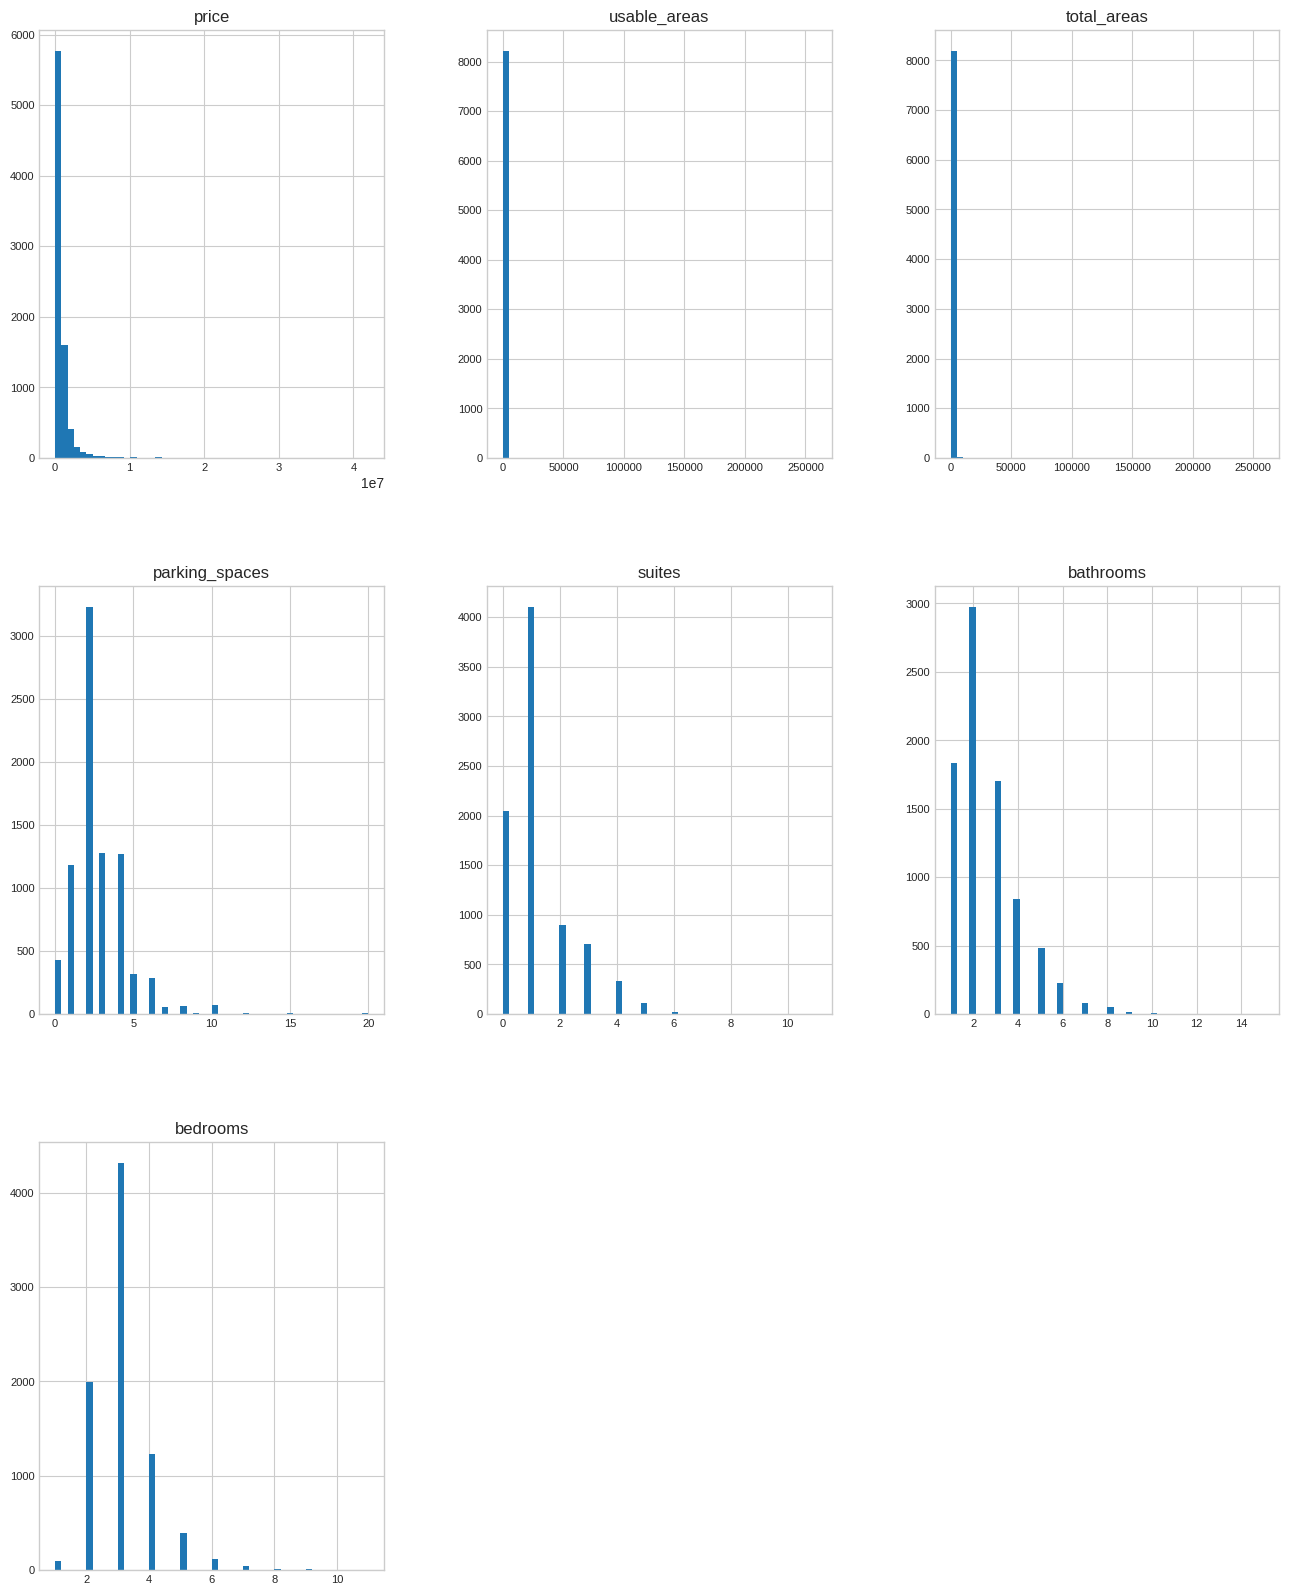

In [93]:
data[numeric_cols].hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)
# Visualização dos histogramas no permite concluir que há grandes outliers nas
# variáveis price, usable_areas, total_areas

### Visualize Outliers

<img src="images /0_Zz3XmuErUXmIcy6C.webp" alt="Some Text" width="400" height="250">

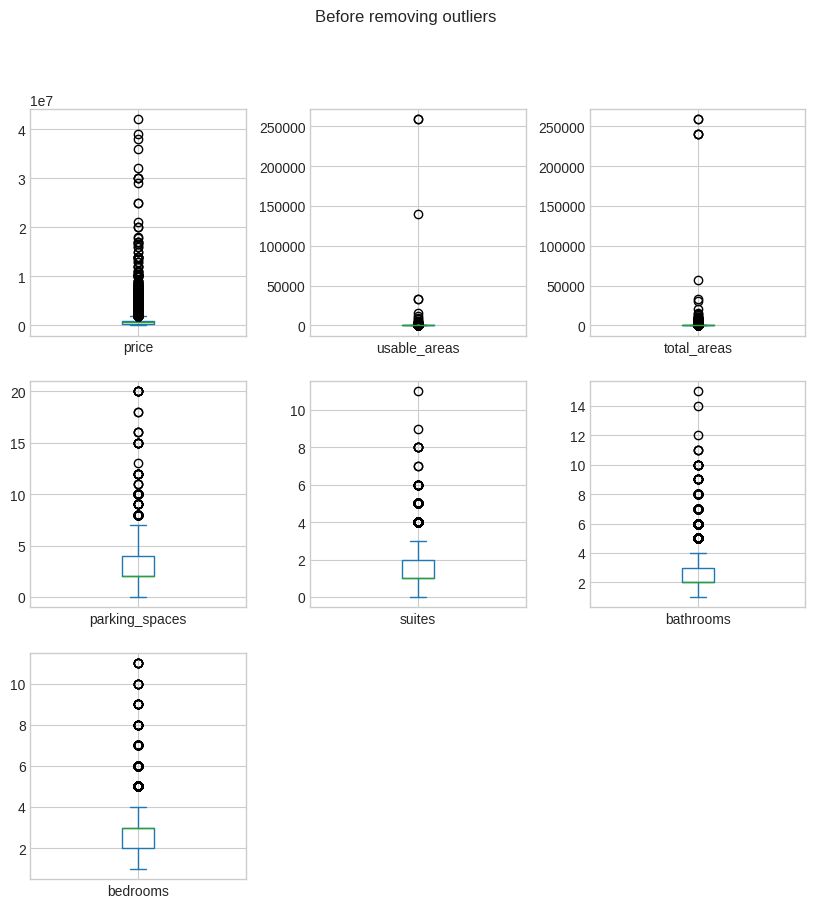

In [94]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))
fig.subplots_adjust(wspace=0.3)
fig.suptitle("Before removing outliers")
for i, col in enumerate(numeric_cols):
    if data[col].dtype != "object":
        data[col].plot(kind="box", ax=axes[i // 3, i % 3])
axes[2, 2].set_visible(False)
axes[2, 1].set_visible(False)

In [95]:
# Specify the columns to remove outliers from
cols_to_clean = [
    "price",
    "usable_areas",
    "total_areas",
]

# Define the lower and upper bounds for filtering outliers
quantiles = data[cols_to_clean].quantile([0.05, 0.95])
lower_bound = quantiles.loc[0.05]
upper_bound = quantiles.loc[0.95]

# Filter out the outliers from each specified column
for col in cols_to_clean:
    data = data[(data[col] > lower_bound[col]) & (data[col] < upper_bound[col])]


In [100]:
# save the data
data.to_csv(f"clean_data_{len(data)}.csv", index=False)

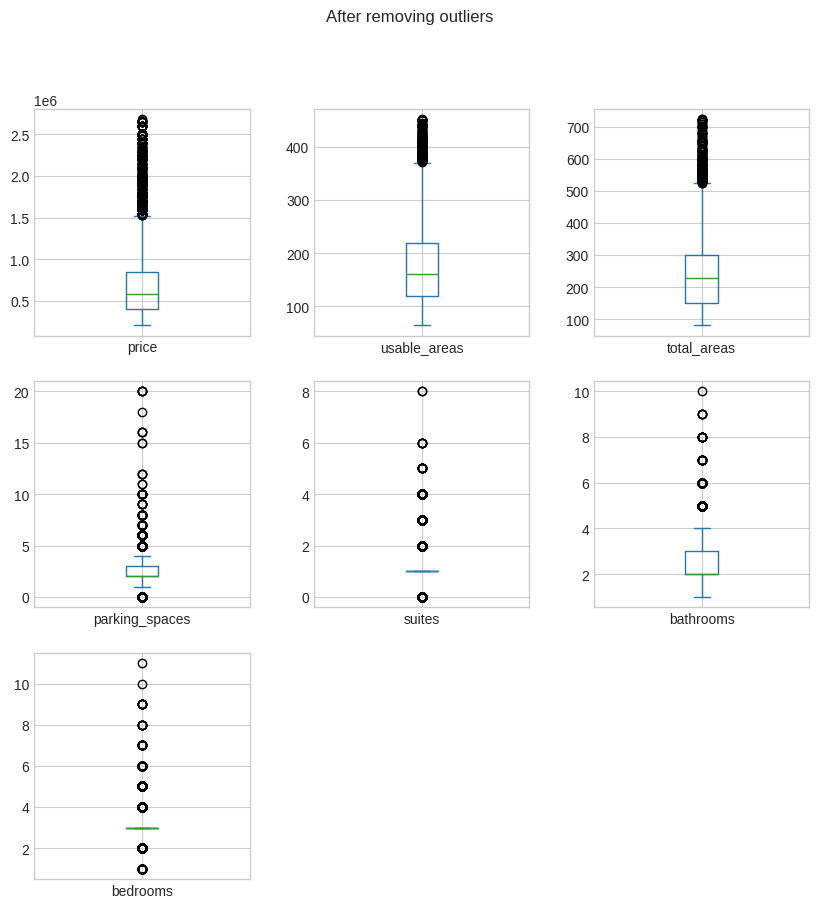

In [96]:
import matplotlib.pyplot as plt
import numpy as np


fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))
fig.subplots_adjust(wspace=0.3)

fig.suptitle("After removing outliers")

for i, col in enumerate(numeric_cols):
    if data[col].dtype != "object":
        data[col].plot(kind="box", ax=axes[i // 3, i % 3])
axes[2, 2].set_visible(False)
axes[2, 1].set_visible(False)

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'usable_areas'}>,
        <Axes: title={'center': 'total_areas'}>],
       [<Axes: title={'center': 'parking_spaces'}>,
        <Axes: title={'center': 'suites'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'bedrooms'}>, <Axes: >, <Axes: >]],
      dtype=object)

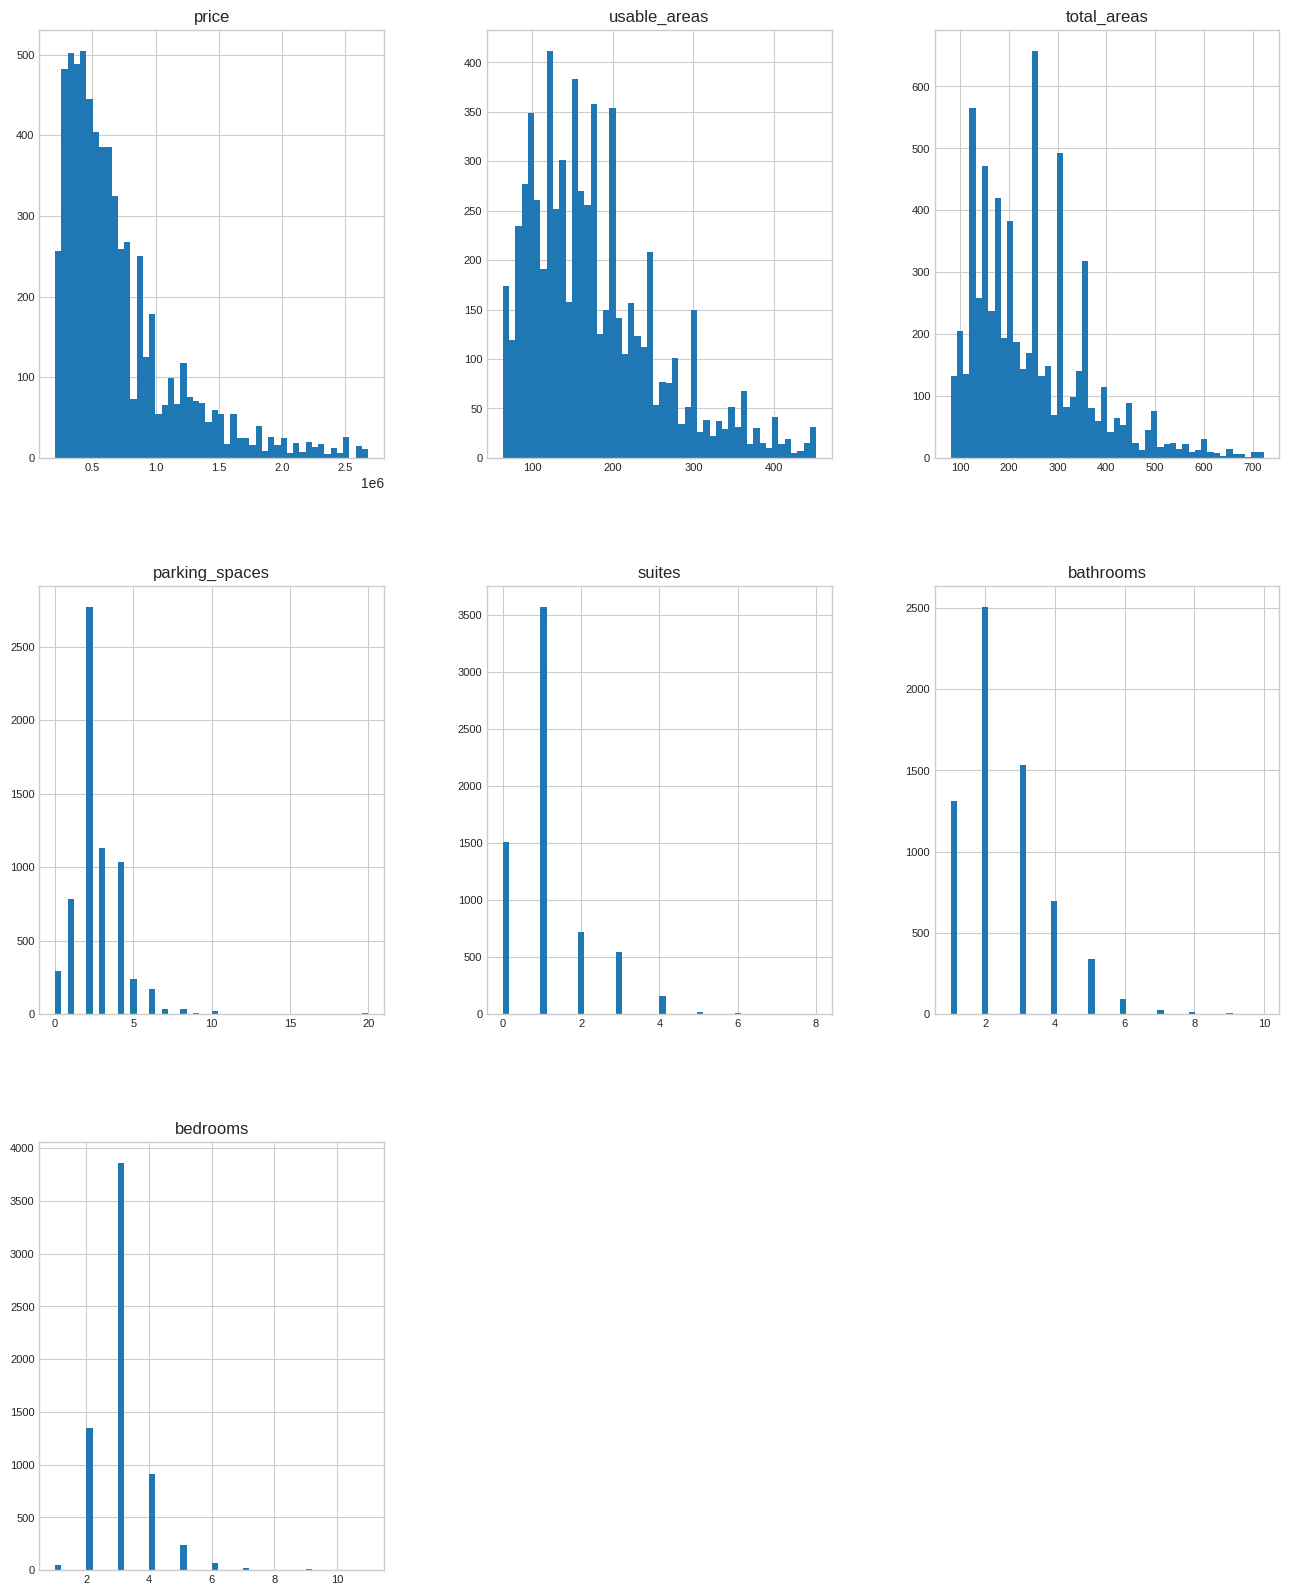

In [98]:
data[numeric_cols].hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

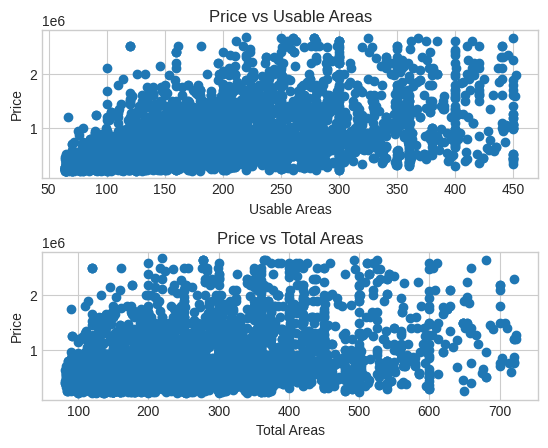

In [99]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2)
fig.subplots_adjust(hspace=0.5, wspace=0.5)
# Scatter plot of "pricingInfo.rawPrice" vs "usableAreas"
axs[0].scatter(data["usable_areas"], data["price"])
axs[0].set_xlabel("Usable Areas")
axs[0].set_ylabel("Price")
axs[0].set_title("Price vs Usable Areas")

# Scatter plot of "pricingInfo.rawPrice" vs "totalAreas"
axs[1].scatter(data["total_areas"], data["price"])
axs[1].set_xlabel("Total Areas")
axs[1].set_ylabel("Price")
axs[1].set_title("Price vs Total Areas")

plt.show()

### Visualize Normal distribution

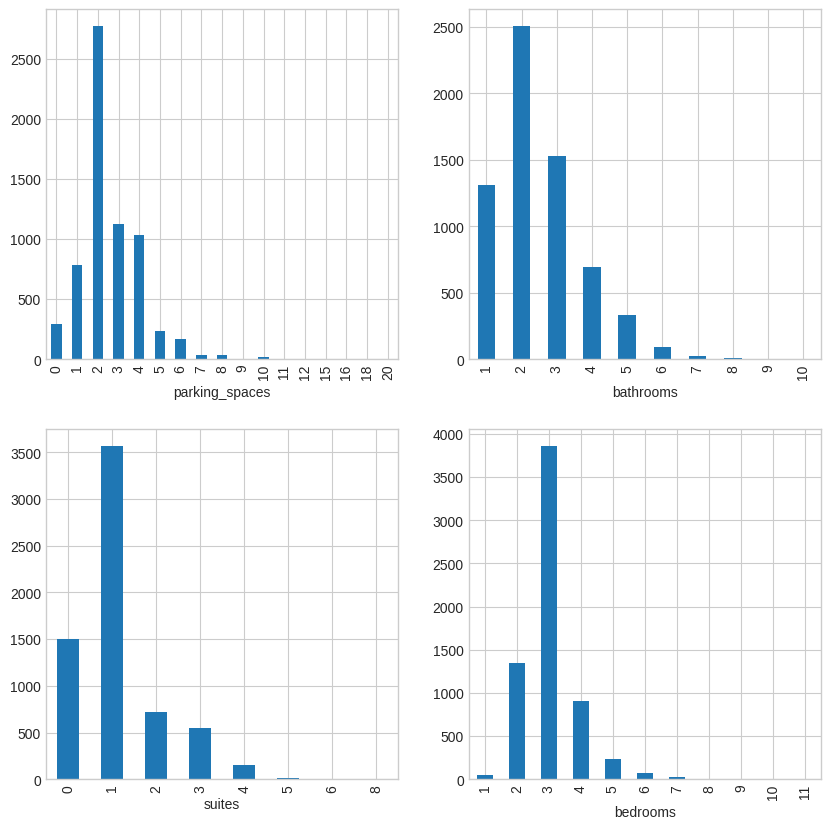

In [59]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
cols_to_plot = [
    "parking_spaces",
    "suites",
    "bathrooms",
    "bedrooms",
]
for i, col in enumerate(cols_to_plot):
    counts = data[col].value_counts().sort_index()
    counts.plot(kind="bar", ax=axes[i % 2, i // 2])
plt.show()

In [60]:
data["price_per_m2"] = data["price"] / data["total_areas"]

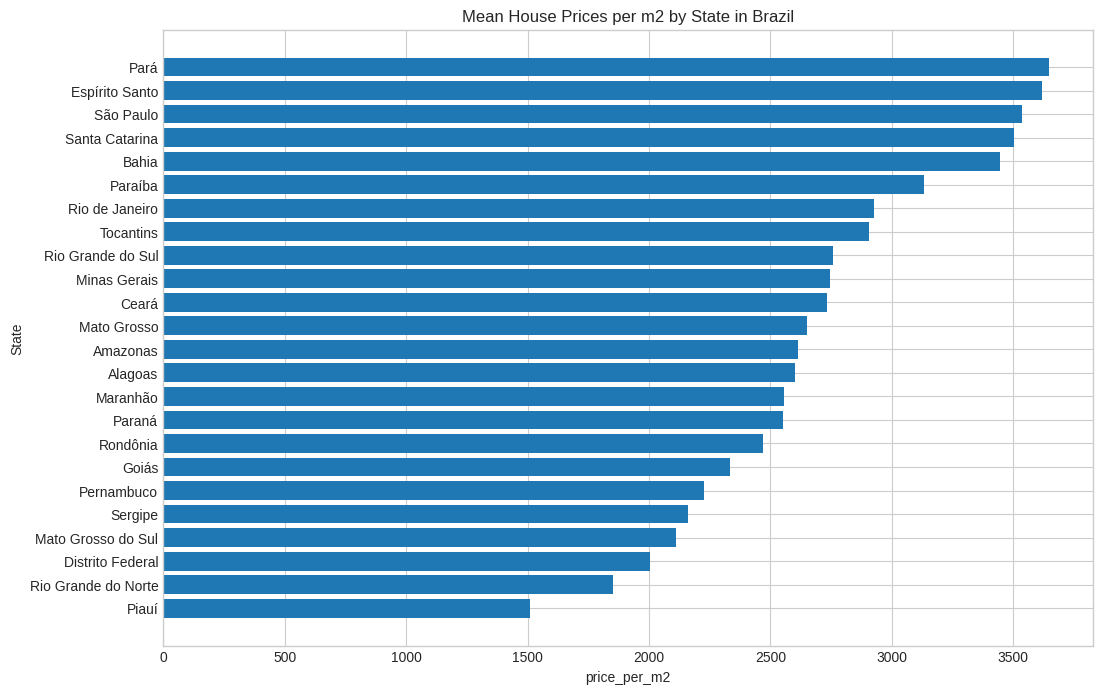

In [61]:
import matplotlib.pyplot as plt

# Group by state and get average price for each state
grouped = data.groupby("state")["price_per_m2"].mean().reset_index()

# Sort by price in ascending order to get the cheapest states
sorted_grouped = grouped.sort_values(by="price_per_m2", ascending=True)

# Create a bar chart for the mean house prices by state
plt.figure(figsize=(12, 8))
plt.barh(sorted_grouped["state"], sorted_grouped["price_per_m2"])
plt.xlabel("price_per_m2")
plt.ylabel("State")
plt.title("Mean House Prices per m2 by State in Brazil")
plt.show()

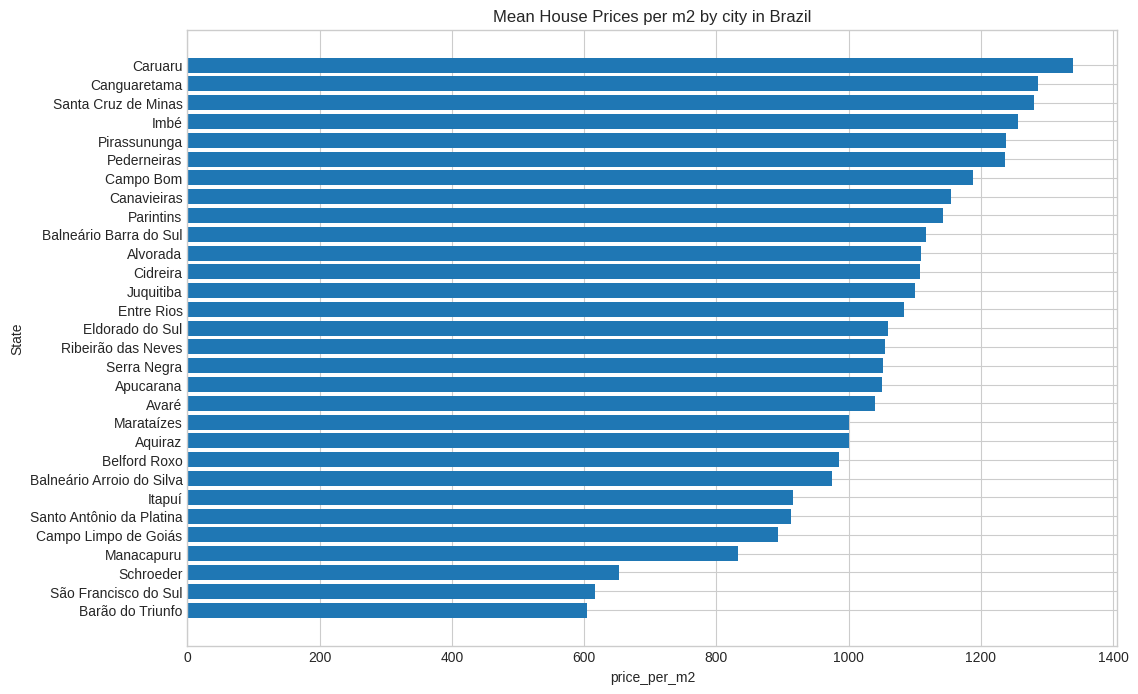

In [62]:
import matplotlib.pyplot as plt

# Group by state and get average price for each state
grouped = data.groupby("city")["price_per_m2"].mean().reset_index()

# Sort by price in ascending order to get the cheapest states
sorted_grouped = grouped.sort_values(by="price_per_m2", ascending=True).head(30)

# Create a bar chart for the mean house prices by state
plt.figure(figsize=(12, 8))
plt.barh(sorted_grouped["city"], sorted_grouped["price_per_m2"])
plt.xlabel("price_per_m2")
plt.ylabel("State")
plt.title("Mean House Prices per m2 by city in Brazil")
plt.show()

In [68]:
from sklearn.preprocessing import StandardScaler

# Padronizar as variáveis numéricas
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[numeric_cols])

In [69]:
from sklearn.decomposition import PCA

# Definir o número de componentes desejado
n_components = 2

# Aplicar o PCA
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(data_scaled)

# Criar um novo dataframe com as componentes principais
principal_df = pd.DataFrame(data=principal_components, columns=["PC1", "PC2"])

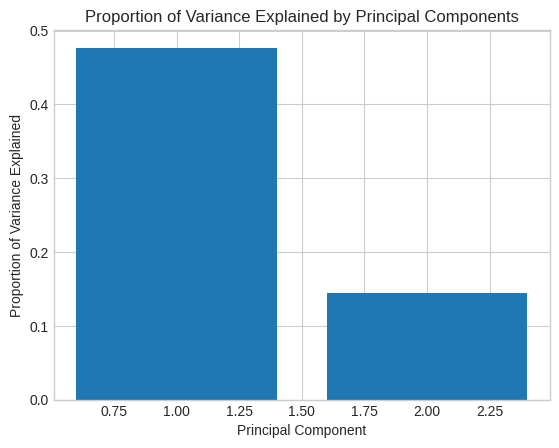

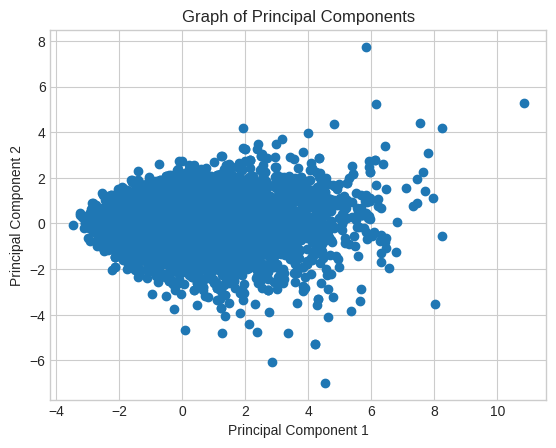

In [71]:
# Verificar a proporção de variância explicada por cada componente
explained_variance_ratio = pca.explained_variance_ratio_

# Plotar um gráfico de barras para a proporção de variância explicada
plt.bar(range(1, n_components + 1), explained_variance_ratio)
plt.xlabel("Principal Component")
plt.ylabel("Proportion of Variance Explained")
plt.title("Proportion of Variance Explained by Principal Components")
plt.show()

# Plotar um gráfico de dispersão das componentes principais
plt.scatter(principal_df["PC1"], principal_df["PC2"])
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Graph of Principal Components")
plt.show()